# Regresión Lineal

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(seed=0)

<IPython.core.display.Javascript object>


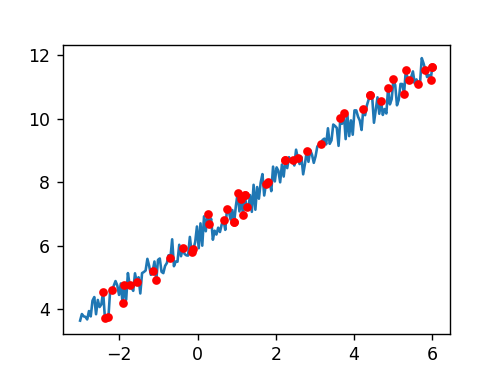

In [2]:
D = lambda x: 0.9*x+5.8 #función para generar puntos

t = np.linspace(-3,6,200) #rango de x

TT = D(t)+np.random.rand(200) #generar datos (sumarle aleatoriedad)


fig = plt.figure(figsize=(4,3))
plt.plot(t,TT)

#Escoger únicamente nd datos
per = np.random.randint(0,200,200)
nd = 50
X = t[per[:nd]]
y = TT[per[:nd]]
y = np.expand_dims(y,axis=1) #Vector columna

plt.plot(X,y,'or',markersize=4)
plt.show()

In [3]:
X.shape

(50,)

In [3]:
#Método Analítico

o = np.ones(nd)
X = X.reshape(nd)
X1 = np.stack((o,X),axis = 1)

inv = np.linalg.inv(np.matmul(X1.T,X1))
w = np.matmul(np.matmul(inv,X1.T,),y)

print(w)

[[6.29722881]
 [0.92668995]]


In [4]:
#Otra forma (sobrecarga de operadores)

np.linalg.inv(X1.T@X1)@X1.T@y #Solo en python 3.5+ (en adelante)

array([[6.29722881],
       [0.92668995]])

<IPython.core.display.Javascript object>


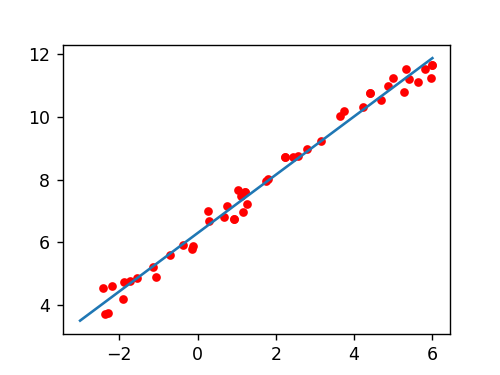

In [5]:
#Graficar recta estimada

G = np.stack((np.ones(200),t),axis = 1)

#w.shape
#G.shape
fig = plt.figure(figsize=(4, 3))
plt.plot(X,y,'or',markersize=4)
plt.plot(t,np.matmul(G,w))
plt.show()

## Regresión Lineal con Gradiente Descendente

In [6]:
#Co = X1.T@X1
#val, _ = np.linalg.eig(Co)
#alfmax = 2/max(val)
#alfmax

<IPython.core.display.Javascript object>


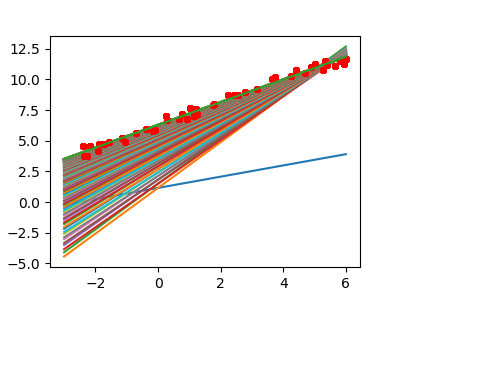

KeyboardInterrupt: 

In [6]:
#Establecer tasa de aprendizaje y pesos iniciales
alfa = 0.1
w = np.random.random_sample((X1.shape[1],1))
w_n = 3*w

i = 0
fig = plt.figure(figsize=(4, 3))

while np.abs(np.linalg.norm(w_n-w)) > 1e-5:
#while i < 1000:
    w_n = w.copy()
    for j in range(2):
        w[j] = w[j] - 1/nd*alfa*np.matmul((np.matmul(X1,w)-y).T,X1[:,j])
    #i+=1
    #print(np.linalg.norm(w_n-w))
        plt.plot(X,y,'or',markersize=4)
        plt.plot(t,np.matmul(G,w))
        plt.show()
        plt.pause(0.1)
        fig.canvas.draw()
        
w

## Ahora con Scikit-learn 

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
print(X.shape)
X = X.reshape(-1, 1)
print(X.shape)

(50,)
(50, 1)


In [13]:
#Pasos básicos SKlearn
clf = LinearRegression() #Se crea el clasificador
clf.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(clf.intercept_,clf.coef_)

[6.29824938] [[0.89682835]]


<IPython.core.display.Javascript object>


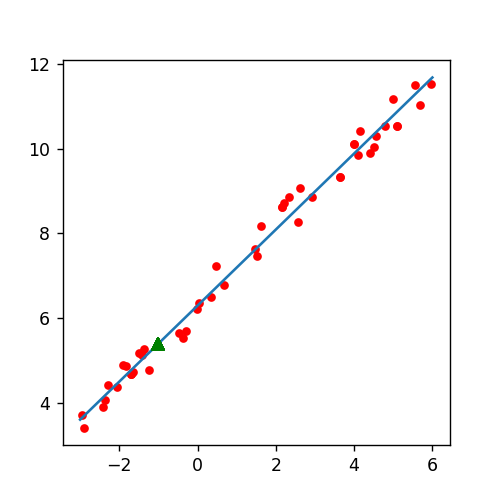

In [16]:
wn = np.array([clf.intercept_,clf.coef_])

G = np.stack((np.ones(200),t),axis = 1)
fig = plt.figure(figsize=(4.0, 4.0))
ax = fig.add_subplot(111)
ax.plot(X,y,'or',markersize=4)
ax.plot(t,np.dot(G,wn))
plt.show()

In [28]:
#Estimar valores Nuevos con la recta hallada

xp = np.array([[-1]])
yp = clf.predict(xp)
ax.plot(xp,yp,'^g', markersize=7)
plt.show()
print(f'para un valor de x de {xp[0,0]} el valor estimado de y (f(x)) es {yp[0,0]}')

para un valor de x de -1 el valor estimado de y (f(x)) es 5.401421038389228


## Regresión Polinomial

<IPython.core.display.Javascript object>


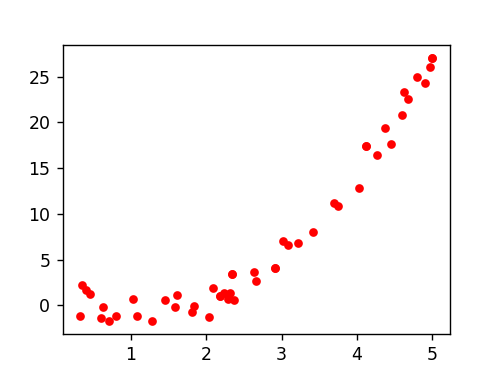

In [7]:
#Crear función polinomial con ruido y seleccionar puntos aleatorios

D2 = lambda x: 2*x**2 - 5*x + 0.2
t2 = np.linspace(0,5,200)
TT2 = D2(t2) + 4 * np.random.rand(200)

fig = plt.figure(figsize=(4.0, 3.0))
# plt.plot(t2,TT2)

per2 = np.random.randint(0,200,200)
nd2 = 50
X2 = t2[per[:nd]]
y2 = TT2[per[:nd]]
y2 = np.expand_dims(y2,axis=1)


plt.plot(X2,y2,'or',markersize=4)

#Ecuación normal

o = np.ones(nd)
X12 = np.stack((o,X2,X2**2),axis = 1)

w = np.linalg.inv(X12.T@X12)@X12.T@y2
w
plt.show()

<IPython.core.display.Javascript object>


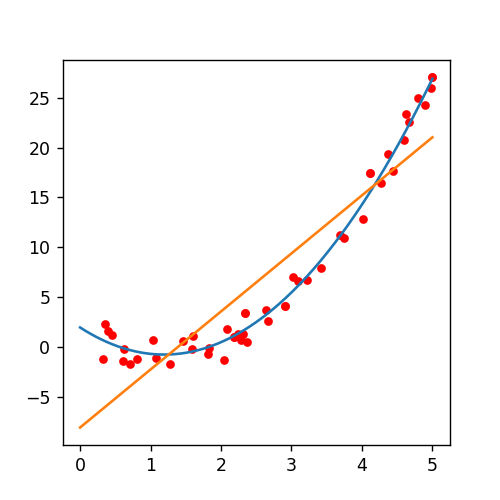

[[-8.09078132]
 [ 5.82477896]]


In [9]:
fig = plt.figure(figsize=(4, 4))
plt.plot(X2,y2,'or',markersize=4)

G2 = np.stack((np.ones(200),t2,t2**2),axis = 1)
plt.plot(t2,np.matmul(G2,w))

G2L = np.stack((np.ones(200),t2),axis = 1)

X1L = np.stack((o,X2),axis = 1)
wL = np.linalg.inv(X1L.T@X1L)@X1L.T@y2 #np.matmul, np.dot
print(wL)
plt.plot(t2,np.matmul(G2L,wL))

plt.show()

<IPython.core.display.Javascript object>


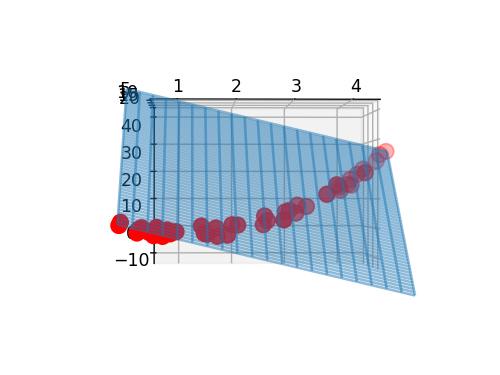

(500, 200)


In [33]:
#Mostrar 3 dimensiones nuevas

fig = plt.figure(figsize=(4, 3.0))
ax = fig.add_subplot(111, projection='3d')

tt = np.linspace(0.0,25.0,500);
[XX, YY] = np.meshgrid(t2,tt);
Xe = XX.flatten()
Ye = YY.flatten()

XY = np.stack((np.ones(len(Xe)),Xe,Ye),axis = 1)
WW = XY@w;
print(XX.shape)
P1 = np.reshape(WW,XX.shape)
#P2 = np.zeros(XX.shape)
#for i in range(XX.shape[0]):
#    for j in range(XX.shape[1]):
#        P2[i,j] = [1,XX[i,j],YY[i,j]]@w
#        
#print(P2)


ax.scatter(X12[:,1],X12[:,2],y2,color='r',s=80)
ax.plot_wireframe(XX,YY,P1,rstride=10,cstride=10,alpha=0.5)
plt.show()

# FIN

In [ ]:
D = lambda x: -0.5*x-0.85
t = np.linspace(-3,6,200)
TT = D(t)+np.random.rand(200)
fig = plt.figure(figsize=(7.2, 6.0))
plt.plot(t,TT)


per = np.random.randint(0,200,200)
nd = 50
X = t[per[:nd]]
y = TT[per[:nd]]
y = np.expand_dims(y,axis=1)

plt.plot(X,y,'or',markersize=4)
np.savez('prueba', X=X,y=y)

In [ ]:
import pickle

with open('prueba.pkl','wb') as f:
    pickle.dump([X,y],f)